## Perceptrón simple - Resolución

### Función de activación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

In [2]:
def binary_step(z):
    return 1 if z>= 0 else 0

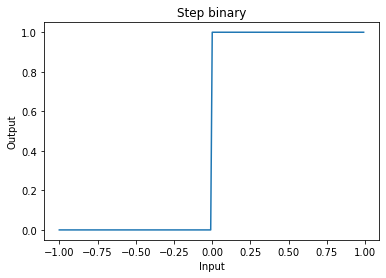

In [3]:
x = np.arange(-1, 1, 0.01)
y = np.vectorize(binary_step)(x)
plt.plot(x, y)
plt.title('Step binary')
plt.xlabel('Input')
plt.ylabel('Output');

### Inicialización de pesos sinapticos

In [4]:
def inicializar_pesos(in_features):
    weights = np.random.rand(in_features)
    bias = np.random.rand(1).item()
    return weights, bias

In [5]:
in_features = 2
w, b = inicializar_pesos(2)
assert w.shape[0] == in_features, 'Error'

In [6]:
w

array([0.30650836, 0.62633551])

In [7]:
b

0.5813297574938379

### Perceptron en una clase

In [8]:
# Plot areas de decision

def eq_plot(w1, w2, b):
    plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
    x = np.arange(-0.5, 1.75, 0.25)
    y = (-(b / w2) / (b / w1))*x + (-b / w2)
    plt.plot(x, y)
    plt.xlim([-0.5,1.50])
    plt.ylim([-0.5,1.50])
    plt.fill_between(x=x,y1=y-200,y2=y+0.01,alpha=.2,color='red')
    plt.fill_between(x=x,y1=y+200,y2=y+0.01,alpha=.2,color='yellow')
    plt.pause(0.05)
    #plt.clf()
    plt.show()

In [9]:
class Perceptron:
    
    def __init__(self, n_caracteristicas: int, n_epocas: int, tasa_aprendizaje: float):
        self.n_caracteristicas = n_caracteristicas
        self.n_epocas = n_epocas
        self.tasa_aprendizaje = tasa_aprendizaje
        
    def __inicializar_pesos(self):
        self.weights = np.random.rand(self.n_caracteristicas)
        self.bias = np.random.rand(1).item()
    
    def __propagacion_adelante(self, x):
        z = binary_step(np.dot(self.weights.T, x) + self.bias)
        return z
    
    def __propagacion_atras(self, x, y):
        z = self.__propagacion_adelante(x)
        error = y - z
        return error
    
    def train(self, X_train, y_train):
        self.__inicializar_pesos()
        for idx in range(self.n_epocas):
            print(f"Epoca {idx+1}/{self.n_epocas}")
            for x, y in zip(X_train, y_train):
                
                error = self.__propagacion_atras(x, y)
                
                # actualizacion de pesos sinapticos
                self.weights = self.weights + self.tasa_aprendizaje * error * x.T
                self.bias = self.bias + self.tasa_aprendizaje * error
      
                display.clear_output(wait=True)  # comentar para ver el grafico epoca a epoca
                display.display(eq_plot(self.weights[0].item(), self.weights[1].item(), self.bias.item()))

            print("----------------------\n")
        
    def predict(self, x):
        return self.__propagacion_adelante(x)
    
    def tasa_error(self, X_eval, y_eval):
        tasa_error = 0
        for x, y in zip(X_eval, y_eval):
            prediction = self.__propagacion_adelante(x)
            if prediction != y:
                tasa_error += 1
        tasa_error = tasa_error / len(y_eval)
        return tasa_error

### Data

In [10]:
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0, 0, 0, 1]]).T

In [11]:
P = Perceptron(n_caracteristicas=X_train.shape[1], n_epocas=1, tasa_aprendizaje=1)

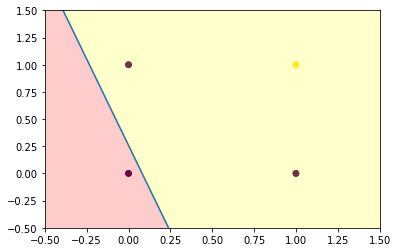

None

----------------------



In [12]:
P.train(X_train, y_train)

In [13]:
P.predict(X_train[3])

1

In [14]:
print("Tasa de error: ", P.tasa_error(X_train, y_train))

Tasa de error:  0.5
